<center><h1 style="text-align: center;"><b>Best Hack 2023 (Финал)</b></h1><center>
<center><h2 style="text-align: center;"><b>GibData Solution</b></h2><center>
    

<h3 style="text-align: center;"><b>Задача: Разработать модель машинного обучения, способную прогнозировать остаточный ресурс колёсной пары</b></h3>

---
## Библиотеки

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

## Данные

    wagnum - номер вагона, 
    prev_fr_id - идентификатор предыдущего груза, 
    prev_is_load - признак гружености предыдущего рейса (1 -  груженый, 0 -  порожний), 
    prev_date_depart - дата отправления предыдущего рейса, 
    prev_date_arrival - дата прибытия предыдущего рейса, 
    prev_snd_org_id - предыдущий грузоотправитель (идентификатор),
    prev_rsv_org_id - предыдущий грузополучатель (идентификатор), 
    prev_distance – расстояние, пройденное в предыдущем рейсе, 
    snd_st_id - станция отправления текущего рейса, 
    rsv_st_id - станция назначения текущего рейса, 
    fr_id - идентификатор груза, 
    is_load - признак гружености текущего рейса, 
    date_depart - дата отправления текущего рейса, 
    rod - РПС, 
    common_ch - обобщенная характеристика, 
    vidsobst - вид собственности, 
    snd_org_id - грузоотправитель (идентификатор), 
    rsv_org_id - грузополучатель (идентификатор), 
    distance - расстояние, пройденное в текущем рейсе, 
    prev_freight - наименование предыдущего груза, 
    prev_fr_group - наименование предыдущей группы груза, 
    freight - наименование груза, 
    fr_group - наименование группы груза.
    target - таргет (продолжительность между прибытием предыдущего рейса и отправлением текущего рейса).

In [2]:
train_df = pd.read_parquet("Финал/Baseline_Lyamin/content/train.parquet")
test_df = pd.read_parquet("Финал/Baseline_Lyamin/content/test.parquet")
train_target = pd.read_csv("Финал/Baseline_Lyamin/content/train_target.csv")
test_submit_example = pd.read_csv("Финал/Baseline_Lyamin/content/test_submit_example.csv")

In [3]:
train_df.shape, test_df.shape, train_target.shape, test_submit_example.shape

((1560699, 23), (221086, 22), (1560699, 1), (221086, 1))

In [4]:
train_df.head(15)

,wagnum,prev_fr_id,prev_is_load,prev_date_depart,prev_date_arrival,prev_snd_org_id,prev_rsv_org_id,prev_distance,snd_st_id,rsv_st_id,...,rod,common_ch,vidsobst,snd_org_id,rsv_org_id,distance,prev_freight,prev_fr_group,freight,fr_group
0,11,1399685,0.0,2022-03-30 22:55:00,2022-04-05 11:07:00,4266126,2279057,4493.0,3609555,4985724,...,8,9.0,Собственные,2279057,9321847,269.0,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,БАНКЕТКИ,Остальные грузы
1,11,292757,1.0,2022-04-07 08:45:00,2022-04-07 18:22:00,2279057,9321847,269.0,4985724,2492408,...,8,9.0,Собственные,9321847,4272291,3584.0,БАНКЕТКИ,Остальные грузы,ГАРНИТУРЫ КУХОН,Остальные грузы
2,11,8674472,1.0,2022-04-11 07:30:00,2022-04-20 15:15:00,9321847,4272291,3584.0,2492408,4288665,...,8,9.0,Собственные,4272291,2555202,417.0,ГАРНИТУРЫ КУХОН,Остальные грузы,КАРНИЗЫ ДЕРЕВ,Лесные грузы
3,11,8210522,1.0,2022-04-23 16:20:00,2022-04-28 03:43:00,4272291,2555202,417.0,4288665,2440270,...,8,9.0,Собственные,2327070,2327070,248.0,КАРНИЗЫ ДЕРЕВ,Лесные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы
4,11,1399685,0.0,2022-05-03 14:47:00,2022-05-04 05:11:00,2327070,2327070,248.0,2440270,2440270,...,8,9.0,Собственные,2327070,2487325,5.0,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,ВАТА МЕД,Остальные грузы
5,11,9276341,0.0,2022-05-05 23:02:22,2022-05-05 23:45:42,2327070,2487325,5.0,2440270,2440270,...,8,9.0,Собственные,2327070,7980401,5.0,ВАТА МЕД,Остальные грузы,ВАТА МЕД,Остальные грузы
6,11,9276341,0.0,2022-05-06 00:52:38,2022-05-06 06:03:42,2327070,7980401,5.0,2440270,8450101,...,8,9.0,Собственные,7980401,6550555,67.0,ВАТА МЕД,Остальные грузы,РИС НЕШЕЛУШ,Хлебные грузы
7,11,2309180,1.0,2022-05-09 00:13:00,2022-05-10 00:54:00,7980401,6550555,67.0,8450101,2440270,...,8,9.0,Собственные,2327070,2327070,67.0,РИС НЕШЕЛУШ,Хлебные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы
8,11,1399685,0.0,2022-05-13 07:30:00,2022-05-14 07:54:00,2327070,2327070,67.0,2440270,8450101,...,8,9.0,Собственные,7980401,6550555,67.0,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы,РИС НЕШЕЛУШ,Хлебные грузы
9,11,2309180,1.0,2022-05-20 15:06:00,2022-05-21 16:57:00,7980401,6550555,67.0,8450101,2440270,...,8,9.0,Собственные,2327070,7980401,67.0,РИС НЕШЕЛУШ,Хлебные грузы,ГАЗЫ УГЛЕВОД ПР,Нефтяные грузы


## EDA

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560699 entries, 0 to 1560698
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   wagnum             1560699 non-null  int64         
 1   prev_fr_id         1560699 non-null  int64         
 2   prev_is_load       1560699 non-null  float64       
 3   prev_date_depart   1560695 non-null  datetime64[ns]
 4   prev_date_arrival  1560451 non-null  datetime64[ns]
 5   prev_snd_org_id    1560699 non-null  int64         
 6   prev_rsv_org_id    1560699 non-null  int64         
 7   prev_distance      1559345 non-null  float64       
 8   snd_st_id          1560699 non-null  int64         
 9   rsv_st_id          1560699 non-null  int64         
 10  fr_id              1560699 non-null  int64         
 11  is_load            1560699 non-null  int64         
 12  date_depart        1560699 non-null  datetime64[ns]
 13  rod                1560699 

In [6]:
train_df.isnull().sum()

wagnum                  0
prev_fr_id              0
prev_is_load            0
prev_date_depart        4
prev_date_arrival     248
prev_snd_org_id         0
prev_rsv_org_id         0
prev_distance        1354
snd_st_id               0
rsv_st_id               0
fr_id                   0
is_load                 0
date_depart             0
rod                     0
common_ch               0
vidsobst                0
snd_org_id              0
rsv_org_id              0
distance             1704
prev_freight            1
prev_fr_group           1
freight                 4
fr_group                4
dtype: int64

## Feature Engineering

### Удаление пропусков в таргете

In [7]:
train_df['target'] = train_target['target']
index_rows = list(train_df[(train_df['prev_date_arrival'].isna()) | (train_df['target'] < 0) | (train_df['prev_date_arrival'] == train_df['date_depart'])].index)
train_df = train_df.drop(index=index_rows)

train_df = train_df.drop(['rod', 'date_depart'], axis=1)

### Функция для работы со временем

In [8]:
date_cols = ['prev_date_depart', 'prev_date_arrival']

In [9]:
import datetime

def extract_time(data, name):
    '''
    Функция для извлечения признаков из времени
    
    Аргументы:
    data -- pandas dataframe с временными рядами
    
    Возвращает:
    pandas dataframe с извлеченными признаками из времени
    '''
    
    weekday = data.dt.weekday.fillna(0)
    hour = data.dt.hour.fillna(0)
    
    result_df = pd.DataFrame({name + '_weekday': weekday.astype(int).astype('category'),
                              name + '_hour': hour.astype(int).astype('category'),
                              name + '_sin_hour': np.sin(hour.astype(int)),
                              name + '_cos_hour': np.cos(hour.astype(int))})
    
    return result_df

In [10]:
def prepare_data(data):
    '''
    Функция для подготовки данных для обучения или тестирования
    
    Аргументы:
    data -- pandas dataframe с исходными признаками
    
    Возвращает:
    pandas dataframe с выборками для обучения или тестирования
    '''
    cat_cols = ['prev_is_load', 'is_load', 'vidsobst', 'prev_freight', 
                'prev_fr_group', 'freight', 'fr_group']
    date_cols = ['prev_date_depart', 'prev_date_arrival']
    
    for date_col in date_cols:
        names = [date_col + i for i in ['_weekday', '_hour', '_sin_hour', '_cos_hour']]
        data[names] = extract_time(data[date_col], date_col)
        data = data.drop(columns=[date_col])
        
    date_cols_preprocess = ['prev_date_depart_weekday', 'prev_date_depart_hour', 'prev_date_arrival_weekday', 'prev_date_arrival_hour']
    cat_cols = cat_cols + date_cols_preprocess
    
    fillna_cols = ['prev_freight', 'prev_fr_group', 'freight', 'fr_group']
    data[fillna_cols] = data[fillna_cols].fillna("Пропуск")
    
    data['prev_is_load'] = data['prev_is_load'].map({1: 'Yes', 0: 'No'}).astype('category')
    data['is_load'] = data['is_load'].map({1: 'Yes', 0: 'No'}).astype('category')
    
    data['common_ch'] = data['common_ch'].fillna(0).astype(int).astype('category')
    cat_cols = cat_cols + ['common_ch']
    
    for cat_col in cat_cols:
        data[cat_col] = data[cat_col].astype('category')
    
    return data

In [11]:
train_df = prepare_data(train_df)
test_df = prepare_data(test_df)

In [12]:
train_df.shape, test_df.shape

((1560114, 28), (221086, 28))

In [13]:
target = train_df['target']
# train_df = train_df.drop(columns=['target'])
# test_df = test_df.drop(columns=['rod'])

In [14]:
cat_cols = ['prev_is_load', 'is_load', 
            'vidsobst', 'prev_freight', 
            'prev_fr_group', 'freight', 
            'fr_group', 'common_ch', 
            'prev_date_depart_weekday', 'prev_date_depart_hour',
            'prev_date_arrival_hour', 'prev_date_arrival_weekday'] + [col for col in list(train_df.columns) if "_id" in col]

### Агрегации

In [15]:
agg = {}

for col_name in cat_cols:
    x = train_df.groupby(col_name)['target'].mean().reset_index()
    x = {k: v for k, v in zip(x[col_name], x['target'])}
    agg[col_name] = x

In [16]:
for col_name in agg.keys():
    train_df[col_name + '_mean_target'] = train_df[col_name].apply(lambda x: agg[col_name][x] if x in agg[col_name].keys() else None).astype(float)
for col_name in agg.keys():
    test_df[col_name + '_mean_target'] = test_df[col_name].apply(lambda x: agg[col_name][x] if x in agg[col_name].keys() else None).astype(float)

In [17]:
train_df = train_df.drop(columns=cat_cols)
test_df = test_df.drop(columns=cat_cols)

In [18]:
train_df.shape, test_df.shape

((1560114, 28), (221086, 28))

### Метрика

In [19]:
def calc_metric(x, y):
    """
    Качество модели будет оцениваться по метрике «Доля предсказаний с ошибкой <12 ч».
    predict это то, что выдала модель
    test это правильные ответы.
    """
    return (np.abs(x - y) < 12).sum() / len(x)

## CatBoost Model

In [20]:
X = train_df.drop(columns=['wagnum', 'target'])
y = target

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=17)

In [21]:
X_train.shape, X_holdout.shape

((1248091, 26), (312023, 26))

In [40]:
from catboost import Pool, cv, CatBoostRegressor

params = {
    'n_estimators' : 1000,
    'learning_rate': .05,
    'l2_leaf_reg' : 2,
    'loss_function': 'MAE',
    'use_best_model': False,
    'task_type': 'CPU',
    'random_state': 42,
}

model = CatBoostRegressor(**params)

model.fit(
    Pool(data=X_train, label=y_train),
    verbose=50,
    eval_set=Pool(data=X_holdout, label=y_holdout),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 53.7462231	test: 53.8310302	best: 53.8310302 (0)	total: 365ms	remaining: 6m 4s
50:	learn: 39.5220897	test: 39.6326397	best: 39.6326397 (50)	total: 9.03s	remaining: 2m 48s
100:	learn: 37.6628455	test: 37.7837246	best: 37.7837246 (100)	total: 17.5s	remaining: 2m 36s
150:	learn: 37.0633688	test: 37.1864534	best: 37.1864534 (150)	total: 25s	remaining: 2m 20s
200:	learn: 36.7133603	test: 36.8366017	best: 36.8366017 (200)	total: 32.8s	remaining: 2m 10s
250:	learn: 36.4791657	test: 36.6008088	best: 36.6008088 (250)	total: 40.8s	remaining: 2m 1s
300:	learn: 36.3127826	test: 36.4336002	best: 36.4336002 (300)	total: 48.7s	remaining: 1m 53s
350:	learn: 36.1458558	test: 36.2641399	best: 36.2641399 (350)	total: 56.6s	remaining: 1m 44s
400:	learn: 36.0325480	test: 36.1511850	best: 36.1511850 (400)	total: 1m 4s	remaining: 1m 36s
450:	learn: 35.9276753	test: 36.0484730	best: 36.0484730 (450)	total: 1m 12s	remaining: 1m 28s
500:	learn: 35.8516991	test: 35.9736861	best: 35.9736861 (500)	total:

In [21]:
params = {
    'n_estimators' : 1000,
    'learning_rate': .05,
    'loss_function': 'MAE',
    'use_best_model': False,
    'task_type': 'CPU',
    'random_state': 42,
}

In [25]:
test_df = test_df.drop(columns=['wagnum', 'rod'])

In [26]:
from sklearn.metrics import mean_absolute_error
from catboost import Pool, cv, CatBoostRegressor
from sklearn.model_selection import StratifiedKFold
import copy

class MetaModel:
    def __init__(self, params):
        self.models = []
        self.params = params
        self.scores = []
        
    def fit(self, **kwargs):
        self.models = []
        self.scores = []
        
        for i in range(5):
            print(f"Model #{i+1}")
            now_params = self.params.copy()
            now_params['random_state'] = 42 + (i * 10)
            now_model = CatBoostRegressor(**now_params)
            now_model.fit(**kwargs)

            # preds = now_model.predict(X_holdout)
            # mae = mean_absolute_error(y_holdout, preds)
            # print(f'Random state {i + 42} mae = {mae}')
            
            # self.scores.append(mae)
            self.models.append(now_model)
            # now_model.save_model(f'models_weights/catboost_model_#{i+1}.bin')
            # print(f"The model #{i+1} is saved")
            print('---------------------------------------------')
        print('---------------------------------------------')
        # print('\nMean acc = {}'.format(np.mean(self.scores)))
    
    def predict(self, X):
        if len(self.models) == 0:
            raise Exception("There is not fitted model")
            
        preds = np.concatenate([model.predict(X).reshape(-1, 1) for model in self.models], axis=1)
        return preds.mean(axis=1)

In [27]:
meta_model = MetaModel(params)
meta_model.fit(X=X, y=y, verbose=500, early_stopping_rounds=500)

Model #1
0:	learn: 53.2645462	total: 279ms	remaining: 4m 38s
500:	learn: 35.4178963	total: 1m 56s	remaining: 1m 55s
999:	learn: 34.9434319	total: 3m 36s	remaining: 0us
---------------------------------------------
Model #2
0:	learn: 53.2690378	total: 238ms	remaining: 3m 58s
500:	learn: 35.4150196	total: 1m 40s	remaining: 1m 39s
999:	learn: 34.9374201	total: 3m 20s	remaining: 0us
---------------------------------------------
Model #3
0:	learn: 53.2611387	total: 236ms	remaining: 3m 55s
500:	learn: 35.3939896	total: 1m 40s	remaining: 1m 39s
999:	learn: 34.9670023	total: 3m 20s	remaining: 0us
---------------------------------------------
Model #4
0:	learn: 53.2785197	total: 219ms	remaining: 3m 38s
500:	learn: 35.4013272	total: 1m 42s	remaining: 1m 41s
999:	learn: 34.8849870	total: 3m 21s	remaining: 0us
---------------------------------------------
Model #5
0:	learn: 53.2567496	total: 227ms	remaining: 3m 46s
500:	learn: 35.3954552	total: 1m 40s	remaining: 1m 39s
999:	learn: 34.9284446	total

In [33]:
calc_metric(y_holdout, pred_meta)

0.3959579902763578

In [28]:
pred_meta = meta_model.predict(test_df)

## AutoML

In [32]:
from flaml import AutoML

automl = AutoML()
automl.fit(X, y, task="regression",
           metric='mae',
           time_budget=1100)

[flaml.automl.automl: 04-30 11:45:38] {2715} INFO - task = regression
[flaml.automl.automl: 04-30 11:45:38] {2717} INFO - Data split method: uniform
[flaml.automl.automl: 04-30 11:45:38] {2720} INFO - Evaluation method: holdout
[flaml.automl.automl: 04-30 11:45:40] {2847} INFO - Minimizing error metric: mae
[flaml.automl.automl: 04-30 11:45:40] {2993} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 04-30 11:45:40] {3322} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-30 11:45:40] {3460} INFO - Estimated sufficient time budget=103898s. Estimated necessary time budget=888s.
[flaml.automl.automl: 04-30 11:45:40] {3507} INFO -  at 13.9s,	estimator lgbm's best error=51.0420,	best estimator lgbm's best error=51.0420
[flaml.automl.automl: 04-30 11:45:40] {3322} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-30 11:45:40] {3507} INFO -  at 14.0s,	estimator lgbm's best erro

In [33]:
import pickle
with open("automl_target_mean.pkl", "wb") as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [22]:
import pickle
# загрузка модели AutoML
with open("automl.pkl", "rb") as f:
    automl = pickle.load(f)

<AxesSubplot:xlabel='is_load_mean_target', ylabel='Density'>

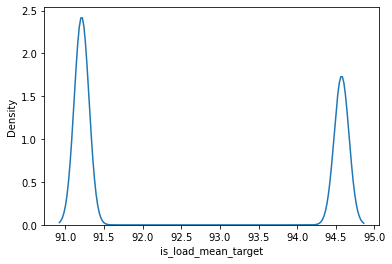

In [78]:
sns.kdeplot(train_df['is_load_mean_target'])

<AxesSubplot:xlabel='is_load_mean_target', ylabel='Density'>

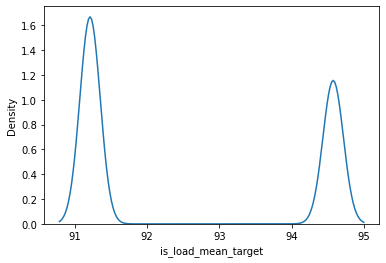

In [79]:
sns.kdeplot(test_df['is_load_mean_target'])

## LightGBMRegressor

In [16]:
import lightgbm as ltb

In [18]:
model = ltb.LGBMRegressor(
    colsample_bytree=0.3500174569887067,
    learning_rate=0.11916095852329972, 
    max_bin=511,
    min_child_samples=6, 
    n_estimators=3443, 
    num_leaves=1650,
    reg_alpha=0.0009765625, 
    reg_lambda=8.031570953658006, 
    verbose=-1
)
model.fit(X_tra0000in, y_train)

LGBMRegressor(colsample_bytree=0.3500174569887067,
              learning_rate=0.11916095852329972, max_bin=511,
              min_child_samples=6, n_estimators=3443, num_leaves=1650,
              reg_alpha=0.0009765625, reg_lambda=8.031570953658006, verbose=-1)

In [31]:
pred_lgbm = model.predict(test_df)

## Предикт на тесте

In [60]:
pd.DataFrame({'target': pred_meta}).to_csv("GibData.csv", index=False)